In [1]:
import sklearn
import sklearn.preprocessing

DO_STANDARD_SCALING = False

In [2]:
import pandas as pd

train_df = pd.read_csv("Data/Challenge/Mixure_Definitions_Training_set.csv")
train_df

,Dataset,Mixture Label,CID,CID.1,CID.2,CID.3,CID.4,CID.5,CID.6,CID.7,...,CID.48,CID.49,CID.50,CID.51,CID.52,CID.53,CID.54,CID.55,CID.56,CID.57
0,Snitz 1,1,6501,264,2879,7685,7731,326,7888,61138,...,0,0,0,0,0,0,0,0,0,0
1,Snitz 1,2,240,93009,323,8148,7762,3314,460,6184,...,0,0,0,0,0,0,0,0,0,0
2,Snitz 1,3,7710,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,Snitz 1,4,31276,93009,11002,323,7966,8148,7632,22201,...,0,0,0,0,0,0,0,0,0,0
4,Snitz 1,5,10890,93009,11002,6982,323,8797,7966,8148,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
698,Bushdid,516,16666,19310,62465,22201,12473,22386,7583,7762,...,0,0,0,0,0,0,0,0,0,0
699,Bushdid,517,0,10821,0,8148,3776,8048,7731,31249,...,0,0,0,0,0,0,0,0,0,0
700,Bushdid,518,6561,12473,7590,24915,261,14100,997,8030,...,0,0,0,0,0,0,0,0,0,0
701,Bushdid,519,2969,264,8048,6054,4133,8635,10560,12348,...,0,0,0,0,0,0,0,0,0,0


In [3]:
train_df["Dataset"].unique()

array(['Snitz 1', 'Snitz 2', 'Ravia', 'Bushdid'], dtype=object)

In [4]:
test_df = pd.read_csv("Data/Challenge/Mixure_Definitions_test_set.csv")
test_df

,Mixture Label,CID,CID.1,CID.2,CID.3,CID.4,CID.5,CID.6,CID.7,CID.8,CID.9
0,1,10890,62465,12180,7799,6054,12367,61016,7410,7749,10722
1,2,31244,14286,7714,8892,18827,12020,7519,7991,10430,7770
2,3,7793,8091,8797,26331,22873,31265,8118,454,6569,93009
3,4,31272,6501,8091,454,31252,6184,7410,8635,22386,7921
4,5,8892,14286,7991,7749,8051,62465,62336,6561,8797,31272
...,...,...,...,...,...,...,...,...,...,...,...
87,88,7793,6654,31265,10722,62336,7654,8118,8635,7770,61138
88,89,7654,8118,8635,7770,61138,1031,12178,12020,5634,22873
89,90,7654,8118,8635,7770,61138,8129,7762,11509,7150,6184
90,91,7888,62465,326,454,8130,1031,12178,12020,5634,22873


In [5]:
leaderboard_df = pd.read_csv("Data/Challenge/Mixure_Definitions_Leaderboard_set.csv")
leaderboard_df

,Dataset,Mixture Label,CID,CID.1,CID.2,CID.3,CID.4,CID.5,CID.6,CID.7,...,CID.48,CID.49,CID.50,CID.51,CID.52,CID.53,CID.54,CID.55,CID.56,CID.57
0,Snitz 1,1,6501,264,2879,7685,7731,326,7888,61138,...,0,0,0,0,0,0,0,0,0,0
1,Snitz 1,3,7710,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,Snitz 1,4,31276,93009,11002,323,7966,8148,7632,22201,...,0,0,0,0,0,0,0,0,0,0
3,Snitz 1,10,7410,6501,7600,7519,264,5281515,6259976,307,...,62336,7888,61016,16666,7119,8635,8918,957,18827,1183
4,Snitz 1,16,10890,7519,323,7583,7762,26331,8892,7888,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
82,Bushdid,488,6054,12348,22386,31249,264,8842,7762,22311,...,0,0,0,0,0,0,0,0,0,0
83,Bushdid,503,4133,5634,31272,15380,8892,7848,5283349,31249,...,0,0,0,0,0,0,0,0,0,0
84,Bushdid,504,4133,5634,31272,15380,8892,7848,5283349,31249,...,0,0,0,0,0,0,0,0,0,0
85,Bushdid,511,7762,12348,66328,3314,8051,176,62433,7799,...,0,0,0,0,0,0,0,0,0,0


In [6]:
leaderboard_df["Dataset"].unique()

array(['Snitz 1', 'Snitz 2', 'Ravia', 'Bushdid'], dtype=object)

In [7]:
# Function to extract Mixture Label and all non-zero CIDs as a list
# This dataset is such a mess lol.
def extract_mixture_labels_and_cids(df):
    result = []
    cid_columns = [col for col in df.columns if col.startswith("CID")]

    for index, row in df.iterrows():
        mixture_label = (row["Dataset"] + "_" if "Dataset" in row else "") + str(
            row["Mixture Label"]
        )
        cids = [cid for cid in row[cid_columns].tolist() if cid != 0]
        # https://www.synapse.org/Synapse:syn53470621/discussion/threadId=11061
        if 81035281168 in cids:
            cids.remove(81035281168)
            cids.append(8103)
            cids.append(5281168)

        # https://www.synapse.org/Synapse:syn53470621/discussion/threadId=11177&replyId=32299
        if 11002307 in cids:
            cids.remove(11002307)
            cids.append(11002)
            cids.append(307)

        if 81295281168 in cids:
            cids.remove(81295281168)
            cids.append(8129)
            cids.append(5281168)

        result.append({"label": mixture_label, "cids": list(set(cids))})

    return result


train_results = extract_mixture_labels_and_cids(train_df)
len(train_results), train_results[0]

(703,
 {'label': 'Snitz 1_1',
  'cids': [1183, 7685, 6501, 326, 264, 7888, 61138, 7731, 8030, 2879]})

In [8]:
test_results = extract_mixture_labels_and_cids(test_df)
len(test_results), test_results[0]

(92,
 {'label': '1',
  'cids': [62465, 10722, 7749, 6054, 10890, 12367, 7410, 12180, 7799, 61016]})

In [9]:
leaderboard_results = extract_mixture_labels_and_cids(leaderboard_df)
len(leaderboard_results), leaderboard_results[0]

(87,
 {'label': 'Snitz 1_1',
  'cids': [1183, 7685, 6501, 326, 264, 7888, 61138, 7731, 8030, 2879]})

In [10]:
smiles_df = pd.read_csv("Data/molecules.csv")
smiles_df = smiles_df.set_index("CID")
cid_to_smiles = smiles_df.to_dict(orient="index")
len(cid_to_smiles), next(iter(cid_to_smiles.items()))

(174, (176, {'SMILES': 'CC(=O)O'}))

In [11]:
missing = set()
for mixture in train_results + test_results + leaderboard_results:
    for cid in mixture["cids"]:
        if not cid in cid_to_smiles:
            missing.add(cid)
missing

set()

In [12]:
from ogb.utils import smiles2graph
import numpy as np
from torch_geometric.data import InMemoryDataset, download_url, Data
import torch
import tqdm


def to_torch(graph):
    tensor_keys = ["edge_index", "edge_feat", "node_feat"]
    for key in tensor_keys:
        graph[key] = torch.tensor(graph[key])
    return Data(
        x=graph["node_feat"].float(),
        edge_attr=graph["edge_feat"],
        edge_index=graph["edge_index"],
    )


graph_data = dict()
for smiles in tqdm.tqdm(smiles_df["SMILES"]):
    graph_data[smiles] = to_torch(smiles2graph(smiles))
len(graph_data), next(iter(graph_data.items()))

 93%|███████████████████████████████████▏  | 161/174 [00:00<00:00, 544.13it/s][12:29:15] WARNING: not removing hydrogen atom without neighbors
[12:29:15] WARNING: not removing hydrogen atom without neighbors
100%|██████████████████████████████████████| 174/174 [00:00<00:00, 530.57it/s]


(168, ('CC(=O)O', Data(x=[4, 9], edge_index=[2, 6], edge_attr=[6, 3])))

In [13]:
train_mixture_df = pd.read_csv("Data/Challenge/TrainingData_mixturedist.csv")
train_mixture_df = train_mixture_df[train_mixture_df["Dataset"].notnull()]
train_mixture_df

,Dataset,Mixture 1,Mixture 2,Experimental Values
0,Snitz 1,1.0,2.0,0.604167
1,Snitz 1,1.0,3.0,0.651042
2,Snitz 1,1.0,5.0,0.505208
3,Snitz 1,1.0,6.0,0.411458
4,Snitz 1,1.0,7.0,0.562500
...,...,...,...,...
495,Bushdid,509.0,510.0,0.461538
496,Bushdid,513.0,514.0,0.692308
497,Bushdid,515.0,516.0,0.730769
498,Bushdid,517.0,518.0,0.538462


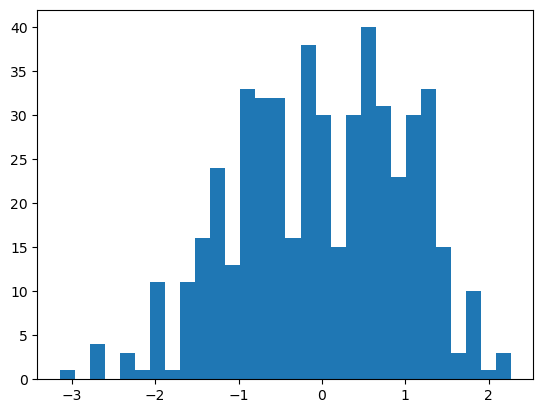

In [14]:
import matplotlib.pyplot as plt

experimental_values = train_mixture_df["Experimental Values"].to_numpy()
scaler = sklearn.preprocessing.StandardScaler().fit(experimental_values.reshape(-1, 1))
scaled_experimental_values = scaler.transform(experimental_values.reshape(-1, 1))
plt.hist(scaled_experimental_values, bins=30)
plt.show()

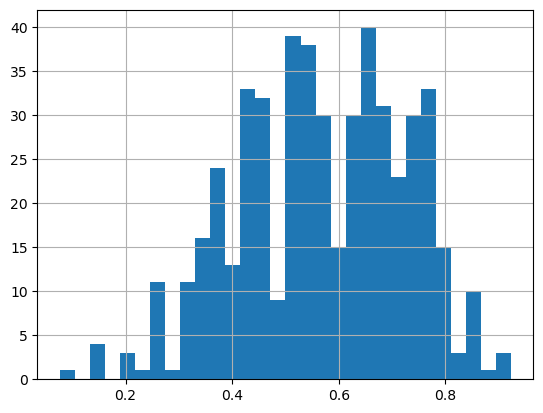

In [15]:
if DO_STANDARD_SCALING:
    train_mixture_df["Experimental Values"] = scaled_experimental_values.squeeze()
train_mixture_df["Experimental Values"].hist(bins=30)
plt.show()

In [16]:
leaderboard_mixture_df = pd.read_csv(
    "Data/Challenge/Leaderboard_set_Submission_form.csv"
)
leaderboard_mixture_df = leaderboard_mixture_df[
    leaderboard_mixture_df["Dataset"].notnull()
]
leaderboard_mixture_df

,Dataset,Mixture_1,Mixture_2,Predicted_Experimental_Values
0,Bushdid,65,66,0
1,Snitz 2,1,8,0
2,Snitz 1,24,17,0
3,Snitz 2,12,14,0
4,Snitz 1,49,45,0
5,Snitz 1,20,16,0
6,Snitz 1,47,39,0
7,Bushdid,29,30,0
8,Snitz 1,10,3,0
9,Bushdid,135,136,0


In [17]:
test_mixture_df = pd.read_csv("Data/Challenge/Test_set_Submission_form.csv")
test_mixture_df = test_mixture_df[test_mixture_df["Dataset"].notnull()]
test_mixture_df

,Dataset,Mixture_1,Mixture_2,Predicted_Experimental_Values
0,CGm01,1,17,0
1,CGm02,2,18,0
2,CGm03,3,19,0
3,CGm04,4,20,0
4,CGm05,5,21,0
5,CGm06,6,22,0
6,CGm07,7,23,0
7,CGm08,8,24,0
8,CGm09,9,25,0
9,CGm10,10,26,0


In [18]:
from torch_geometric.loader import DataLoader
import torch_geometric as tg
import collections
import data


def make_mixture(mixture):
    return data.combine_graphs(
        [graph_data[cid_to_smiles[cid]["SMILES"]] for cid in mixture["cids"]]
    )


def make_mixture_data(results, mixture_df, mixture_col, use_dataset, use_y):
    label_to_data = dict()
    for mixture in results:
        graphs = [graph_data[cid_to_smiles[cid]["SMILES"]] for cid in mixture["cids"]]
        label_to_data[mixture["label"]] = data.combine_graphs(graphs)

    mixture_data = []
    for _, row in mixture_df.iterrows():
        label1 = (row["Dataset"] + "_" if use_dataset else "") + str(
            int(row[mixture_col + "1"])
        )
        graph1 = label_to_data[label1]
        label2 = (row["Dataset"] + "_" if use_dataset else "") + str(
            int(row[mixture_col + "2"])
        )
        graph2 = label_to_data[label2]

        pair_data = {"label": f"{label1}+{label2}", "graph1": graph1, "graph2": graph2}
        if use_y:
            pair_data["y"] = torch.tensor(row["Experimental Values"])
        mixture_data.append(pair_data)

    return mixture_data


# Wow what a crazy dataset :(
train_mixture_data = make_mixture_data(
    train_results, train_mixture_df, "Mixture ", use_dataset=True, use_y=True
)
len(train_mixture_data), train_mixture_data[0]

(500,
 {'label': 'Snitz 1_1+Snitz 1_2',
  'graph1': BlendData(x=[97, 9], edge_index=[2, 190], edge_attr=[190, 3], mol_batch=[97], blend_batch=[10]),
  'graph2': BlendData(x=[96, 9], edge_index=[2, 192], edge_attr=[192, 3], mol_batch=[96], blend_batch=[10]),
  'y': tensor(0.6042)})

In [19]:
leaderboard_mixture_data = make_mixture_data(
    leaderboard_results,
    leaderboard_mixture_df,
    "Mixture_",
    use_dataset=True,
    use_y=False,
)
len(leaderboard_mixture_data), leaderboard_mixture_data[0]

(46,
 {'label': 'Bushdid_65+Bushdid_66',
  'graph1': BlendData(x=[263, 9], edge_index=[2, 504], edge_attr=[504, 3], mol_batch=[263], blend_batch=[27]),
  'graph2': BlendData(x=[233, 9], edge_index=[2, 438], edge_attr=[438, 3], mol_batch=[233], blend_batch=[27])})

In [20]:
test_mixture_data = make_mixture_data(
    test_results, test_mixture_df, "Mixture_", use_dataset=False, use_y=False
)
len(test_mixture_data), test_mixture_data[0]

(46,
 {'label': '1+17',
  'graph1': BlendData(x=[95, 9], edge_index=[2, 178], edge_attr=[178, 3], mol_batch=[95], blend_batch=[10]),
  'graph2': BlendData(x=[95, 9], edge_index=[2, 178], edge_attr=[178, 3], mol_batch=[95], blend_batch=[10])})

In [21]:
import h5py


def make_file(fname, mixture_data):
    with h5py.File(fname, "w") as f:
        for data in tqdm.tqdm(mixture_data):
            group = f.create_group(data["label"])
            graph_group1 = group.create_group("graph1")
            for k, v in data["graph1"].items():
                graph_group1.create_dataset(k, data=v.numpy())
            graph_group2 = group.create_group("graph2")
            for k, v in data["graph2"].items():
                graph_group2.create_dataset(k, data=v.numpy())
            if "y" in data:
                group.create_dataset("y", data=data["y"].numpy())


make_file("Data/train.h5", train_mixture_data)

100%|█████████████████████████████████████| 500/500 [00:00<00:00, 1217.82it/s]


In [22]:
make_file("Data/test.h5", test_mixture_data)

100%|███████████████████████████████████████| 46/46 [00:00<00:00, 1627.22it/s]


In [23]:
make_file("Data/leaderboard.h5", leaderboard_mixture_data)

100%|███████████████████████████████████████| 46/46 [00:00<00:00, 1326.34it/s]
